<a href="https://colab.research.google.com/github/Yamada8412/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

numpyとmatplotlibを利用して、楕円の中で球を打ち、20回楕円内を反射したときの軌道を描くプログラムを作成する

In [23]:
import numpy as np
import matplotlib.pyplot as plt

change_posi関数は、球が反射したときに、次に到達する座標を計算する関数です。

引数は(次の場所に向かう方向(傾き)、現在の球の位置、a、b)
a,bは楕円のx,y方向の大きさです

In [24]:
def change_posi(now_direc,now_posi,a,b):

  new_posi = [None,None]

  c = now_direc
  d = -1 * now_direc * now_posi[0] + now_posi[1]

  A = (1/a**2 + c**2/b**2)
  B = 2 * c * d / b**2
  C = (d**2 / b**2) -1
  D = B**2 - 4 * A * C

  x1 = (-B + D**(1/2)) / (2*A) #到達するx座標と現在いる座標がx1,x2
  x2 = (-B - D**(1/2)) / (2*A)

  #現在、x1とx2のどちらにいるか条件分岐
  if round(now_posi[0],8) == round(x2,8):#コンピューター上では、5が5.00000001になったりして正しく計算できないので
                                         #round関数で少数第8桁で丸め込む
    new_posi[0] = x1
    
    #楕円のような円形の関数は、y>=0とy<0で、yのプラスマイナスが変わってくるので条件分岐 
    if now_direc >= 0 and now_posi[1] <= 0:
      if -a <=  now_posi[0] - now_posi[1] / now_direc <= a:
        new_posi[1] = (b**2 - (x1**2 * b**2 / a**2)) ** (1/2)

      else:
        new_posi[1] = -(b**2 - (x1**2 * b**2 / a**2)) ** (1/2)

    elif now_direc >= 0 and now_posi[1] > 0:
      new_posi[1] = (b**2 - (x1**2 * b**2 / a**2)) ** (1/2)

    elif now_direc < 0 and now_posi[1] <= 0:
      new_posi[1] = -(b**2 - (x1**2 * b**2 / a**2)) ** (1/2)

    else:
      if -a <=  now_posi[0] - now_posi[1] / now_direc <= a:
        new_posi[1] = -(b**2 - (x1**2 * b**2 / a**2)) ** (1/2)
      else:
        new_posi[1] = (b**2 - (x1**2 * b**2 / a**2)) ** (1/2)

  else:
    new_posi[0] = x2
   
    if now_direc >= 0 and now_posi[1] >= 0:
      if -a <=  now_posi[0] - now_posi[1] / now_direc <= a:
        new_posi[1] = -(b**2 - (x2**2 * b**2 / a**2)) ** (1/2)
      else:
        new_posi[1] = (b**2 - (x2**2 * b**2 / a**2)) ** (1/2)

    elif now_direc >= 0 and now_posi[1] < 0:
      new_posi[1] = -(b**2 - (x2**2 * b**2 / a**2)) ** (1/2)

    elif now_direc < 0 and now_posi[1] >= 0:
      new_posi[1] = (b**2 - (x2**2 * b**2 / a**2)) ** (1/2)

    else:
      if -a <=  now_posi[0] - now_posi[1] / now_direc <= a:
        new_posi[1] = (b**2 - (x2**2 * b**2 / a**2)) ** (1/2)
      else:
        new_posi[1] = -(b**2 - (x2**2 * b**2 / a**2)) ** (1/2)

  return new_posi#次に到達する座標

reflect_direc関数は、次に向かう方向(角度)を計算する関数です。

引数は、上で求めた次に到達する座標、現在向いている方向(傾き)、a、b

In [25]:
def reflect_direc(new_posi,now_direc,a,b):

  #degは次到達する座標の接線の傾き
  #vert_degは、degの垂線の傾き

  if new_posi[0] == 0:#楕円のx=0の点の接線の傾きは０、接線の垂線は∞(ここでは10**13)になる
    deg = 0            
    vert_deg = 10**13  

  elif new_posi[1] == 0:
    deg = 10**13
    vert_deg = 0

  else:
    deg = -b**2 * new_posi[0]/(a**2 * new_posi[1])
    vert_deg = -1/deg

  if np.degrees(np.arctan(deg)) < 0:#楕円の接線の傾きを度に変換 0<= new_deg <= 180
    new_deg = 180 + np.degrees(np.arctan(deg))
  else:
    new_deg = np.degrees(np.arctan(deg))
  
  if np.degrees(np.arctan(now_direc)) < 0:#現在向いている方向(傾き)を度に変換 0<= new_direc <=180
    new_direc = 180 + np.degrees(np.arctan(now_direc))
  else:
    new_direc = np.degrees(np.arctan(now_direc))
  
  theta = new_deg - new_direc 
  #接点で反射した後に向かう方向(角度)は、どこで反射するかで変わるので条件分岐
  if deg >= 0 and new_posi[0] <= 0:
    reflect_direc = new_deg + theta -180
  elif deg >= 0 and new_posi[0] >= 0:
    reflect_direc = theta + new_deg
  elif deg <= 0 and new_posi[0] >= 0:
    reflect_direc = theta + new_deg
  else:
    reflect_direc = theta - 180 + new_deg

  return_direc = np.tan(np.radians(reflect_direc))
  
  return return_direc

下のプログラムで実際にプロットします

打ち出す角度を設定してください(0から180):30
楕円のx軸方向の長さを設定してください：1
楕円のy軸方向の長さを設定してください：3


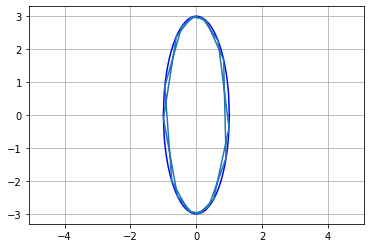

In [29]:
now_direc = np.tan(np.radians(int(input('打ち出す角度を設定してください(0から180):'))))

a = int(input('楕円のx軸方向の長さを設定してください：'))
b = int(input('楕円のy軸方向の長さを設定してください：'))

first_posi = [0,-b]#球を打ち出す初期位置を設定
cha = change_posi(now_direc,first_posi,a,b)
dir = reflect_direc(cha,now_direc,a,b)#次の場所に向かうための方向を計算

posi = np.array([[0],[-b]])

for _ in range(0,20): #20回球を反射させます

  posi = np.append(posi,np.array([[cha[0]],[cha[1]]]),axis = 1)
  cha = change_posi(dir,cha,a,b)
  dir = reflect_direc(cha,dir,a,b)

t = np.linspace(-a,a,100)#楕円の作成
y = (b**2 - (t**2 * b**2 / a**2)) ** (1/2)
y1 = -1 * (b**2 - (t**2 * b**2 / a**2)) ** (1/2)

plt.plot(t,y,c = 'b')#楕円をプロット
plt.plot(t,y1,c = 'b')

plt.grid()
plt.plot(posi[0,:],posi[1,:])
plt.axis('equal')
plt.show()

円形で108の角度で打ち出すと星形になったりしますが、自分のお気に入りはa =3,b=2,80度で打ち出したときに、カーボンナノチューブみたいのものができるところです。(反射回数は60回)

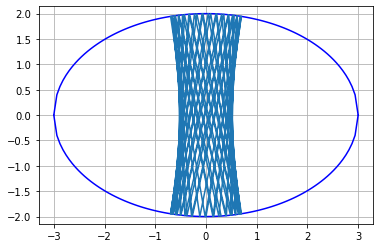

In [28]:
now_direc = np.tan(np.radians(80))

a = 3
b = 2

first_posi = [0,-b]
cha = change_posi(now_direc,first_posi,a,b)
dir = reflect_direc(cha,now_direc,a,b)

posi = np.array([[0],[-b]])

for _ in range(0,60):

  posi = np.append(posi,np.array([[cha[0]],[cha[1]]]),axis = 1)
  cha = change_posi(dir,cha,a,b)
  dir = reflect_direc(cha,dir,a,b)

t = np.linspace(-a,a,100)
y = (b**2 - (t**2 * b**2 / a**2)) ** (1/2)
y1 = -1 * (b**2 - (t**2 * b**2 / a**2)) ** (1/2)

plt.plot(t,y,c = 'b')
plt.plot(t,y1,c = 'b')

plt.grid()
plt.plot(posi[0,:],posi[1,:])
plt.axis('equal')
plt.show()